In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import visualkeras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pydot
import graphviz

In [70]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [71]:
classes = {0 : 'T-shirt/top',
1 :  'Trouser',
2 : 'Pullover',
3 : 'Dress',
4 : 'Coat',
5 : 'Sandal',
6 : 'Shirt',
7 : 'Sneaker',
8 : 'Bag',
9 : 'Ankle boot'}

In [72]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
train_df.shape

(60000, 785)

In [75]:
test_df.shape

(10000, 785)

In [131]:
train_df['label_names'] = train_df['label'].map(classes)

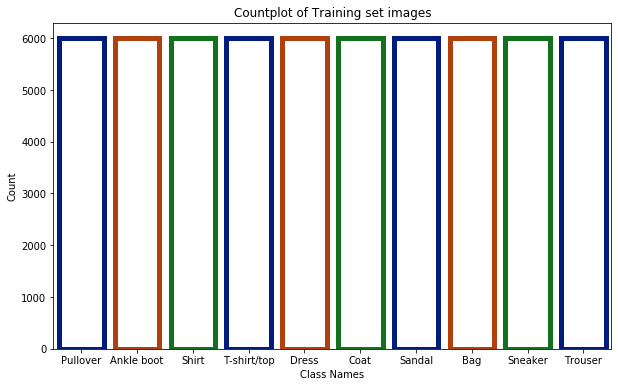

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'label_names', data = train_df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of Training set images wrt classes')
plt.show()

In [140]:
test_df['label_names'] = test_df['label'].map(classes)

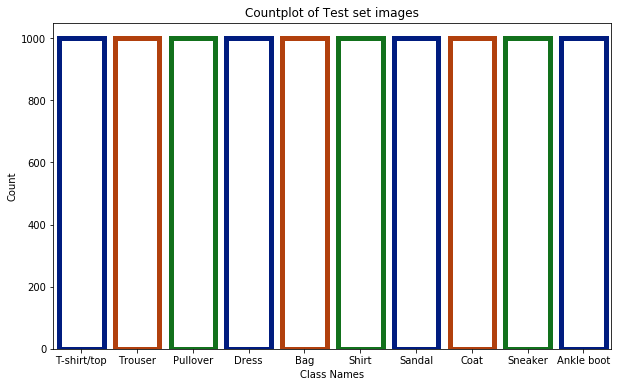

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'label_names', data = test_df, facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Distribution of Test set images wrt classes')
plt.show()

In [76]:
#data preprocessing

In [77]:
#dividing training and test sets into features and labels

In [78]:
X_train = train_df.drop(['label', 'label_names'], axis = 1)
y_train = train_df.label

In [79]:
X_test = test_df.drop(['label', 'label_names'], axis = 1)
y_test = test_df.label

In [80]:
#reshaping

In [81]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28)

In [82]:
X_train.shape

(60000, 28, 28)

In [83]:
X_test.shape

(10000, 28, 28)

In [84]:
#visualizing a single image

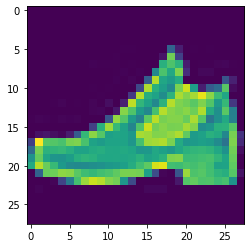

In [85]:
single_image = X_train[1]
plt.imshow(single_image)

In [86]:
#seems like an ankle boot

In [87]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [88]:
# Index 1 has 9 as a value which is the key of Ankle boot as per classes dictionary, so we stand correct

In [89]:
#one-hot encoding

In [90]:
y_cat_train = to_categorical(y_train, num_classes= 10)
y_cat_test = to_categorical(y_test, num_classes= 10)

In [91]:
#normalizing the image

In [92]:
X_train = X_train/255
X_test = X_test/255

In [93]:
#adding the color channel, since it's a grey scale image, we'll have 1 color channel

In [94]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [95]:
X_train.shape

(60000, 28, 28, 1)

In [96]:
X_test.shape

(10000, 28, 28, 1)

In [97]:
#train and validation data split

In [98]:
X_train, X_val, y_cat_train, y_val = train_test_split(X_train, y_cat_train, test_size=0.2, random_state=42)

In [99]:
X_train.shape

(48000, 28, 28, 1)

In [100]:
#Structuring a Convolutional Neural Network

In [101]:
model = Sequential()

In [102]:
model.add(Conv2D(filters = 32, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

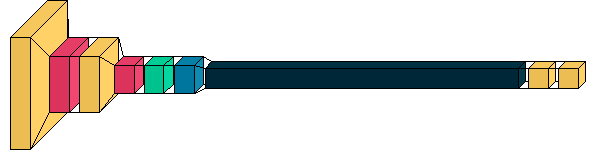

In [104]:
visualkeras.layered_view(model)

In [105]:
#Earlystopping to prevent overfitting

In [106]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 25)

In [108]:
model.fit(x = X_train, y = y_cat_train, batch_size = 32, epochs = 100, validation_data = (X_val, y_val), 
          callbacks = [early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 76s 2ms/sample - loss: 0.4031 - accuracy: 0.8520 - val_loss: 0.2846 - val_accuracy: 0.8957
Epoch 2/100
48000/48000 [==============================] - 75s 2ms/sample - loss: 0.2742 - accuracy: 0.8987 - val_loss: 0.2697 - val_accuracy: 0.9018
Epoch 3/100
48000/48000 [==============================] - 73s 2ms/sample - loss: 0.2377 - accuracy: 0.9103 - val_loss: 0.2453 - val_accuracy: 0.9107
Epoch 4/100
48000/48000 [==============================] - 73s 2ms/sample - loss: 0.2111 - accuracy: 0.9198 - val_loss: 0.2464 - val_accuracy: 0.9116
Epoch 5/100
48000/48000 [==============================] - 74s 2ms/sample - loss: 0.1902 - accuracy: 0.9272 - val_loss: 0.2520 - val_accuracy: 0.9118
Epoch 6/100
48000/48000 [==============================] - 74s 2ms/sample - loss: 0.1735 - accuracy: 0.9339 - val_loss: 0.2450 - val_accuracy: 0.9183
Epoch 7/100
48000/48000 [=========================

In [109]:
metrics = pd.DataFrame(model.history.history)

In [110]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.403061,0.851979,0.284629,0.895667
1,0.274178,0.898729,0.269711,0.901833
2,0.237703,0.910292,0.245301,0.910750
3,0.211119,0.919813,0.246408,0.911583
4,0.190248,0.927167,0.251995,0.911750


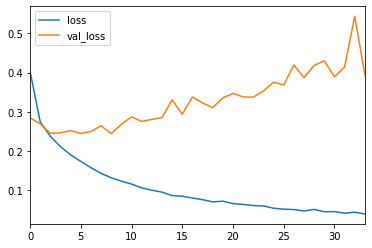

In [111]:
metrics[['loss', 'val_loss']].plot()

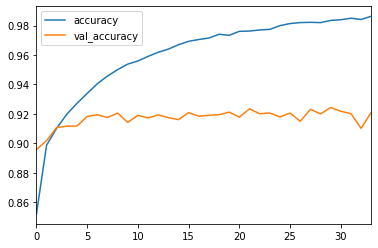

In [112]:
metrics[['accuracy', 'val_accuracy']].plot()

In [113]:
#The model is overfitting as the validation loss is going up and the validation accuracy is going down

In [114]:
model.metrics_names

['loss', 'accuracy']

In [116]:
model.evaluate(X_test, y_cat_test, verbose = 0)

[0.35635671381726863, 0.9235]

In [ ]:
#second one

In [117]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
model.add(Conv2D(filters = 128, kernel_size= (4,4), padding = 'same', input_shape = (28,28,1), activation= 'relu'))
model.add(Dropout(rate = 0.3))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(10, activation='softmax'))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [118]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)        

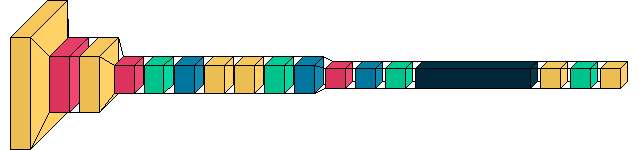

In [119]:
visualkeras.layered_view(model)

In [120]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 25)

In [121]:
#plot_model(model, to_file= 'model.png')

In [122]:
model.fit(x = X_train, y = y_cat_train, batch_size = 128, epochs = 100, validation_data = (X_val, y_val), 
         callbacks = [early_stop])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 130s 3ms/sample - loss: 0.6014 - accuracy: 0.7762 - val_loss: 2.2927 - val_accuracy: 0.2757
Epoch 2/100
48000/48000 [==============================] - 127s 3ms/sample - loss: 0.3736 - accuracy: 0.8643 - val_loss: 0.3021 - val_accuracy: 0.8870
Epoch 3/100
48000/48000 [==============================] - 128s 3ms/sample - loss: 0.3191 - accuracy: 0.8835 - val_loss: 0.3109 - val_accuracy: 0.8781
Epoch 4/100
48000/48000 [==============================] - 128s 3ms/sample - loss: 0.2911 - accuracy: 0.8949 - val_loss: 0.2513 - val_accuracy: 0.9073
Epoch 5/100
48000/48000 [==============================] - 129s 3ms/sample - loss: 0.2723 - accuracy: 0.9012 - val_loss: 0.2451 - val_accuracy: 0.9093
Epoch 6/100
48000/48000 [==============================] - 131s 3ms/sample - loss: 0.2562 - accuracy: 0.9045 - val_loss: 0.2366 - val_accuracy: 0.9085
Epoch 7/100
48000/48000 [===================

Epoch 55/100
48000/48000 [==============================] - 84s 2ms/sample - loss: 0.0713 - accuracy: 0.9736 - val_loss: 0.2690 - val_accuracy: 0.9291
Epoch 56/100
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.0689 - accuracy: 0.9743 - val_loss: 0.2538 - val_accuracy: 0.9326
Epoch 57/100
48000/48000 [==============================] - 82s 2ms/sample - loss: 0.0698 - accuracy: 0.9747 - val_loss: 0.2696 - val_accuracy: 0.9250
Epoch 58/100
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.0681 - accuracy: 0.9747 - val_loss: 0.2724 - val_accuracy: 0.9262
Epoch 59/100
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.0652 - accuracy: 0.9760 - val_loss: 0.2635 - val_accuracy: 0.9323
Epoch 60/100
48000/48000 [==============================] - 82s 2ms/sample - loss: 0.0657 - accuracy: 0.9747 - val_loss: 0.2750 - val_accuracy: 0.9273
Epoch 61/100
48000/48000 [==============================] - 82s 2ms/sample - loss: 0.0672 - ac

In [123]:
metrics = pd.DataFrame(model.history.history)

In [124]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.601408,0.776187,2.292728,0.275667
1,0.373650,0.864313,0.302068,0.887000
2,0.319146,0.883500,0.310892,0.878083
3,0.291073,0.894875,0.251297,0.907333
4,0.272319,0.901187,0.245054,0.909333


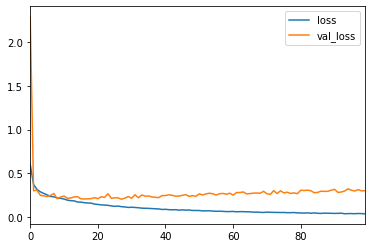

In [125]:
metrics[['loss', 'val_loss']].plot()

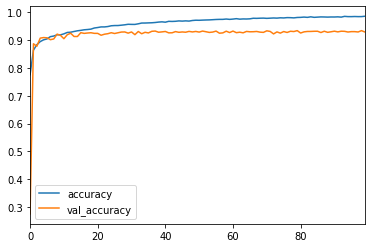

In [126]:
metrics[['accuracy', 'val_accuracy']].plot()

In [127]:
model.metrics_names

['loss', 'accuracy']

In [129]:
model.evaluate(X_test, y_cat_test, verbose = 0)

[0.2971340233185794, 0.9325]

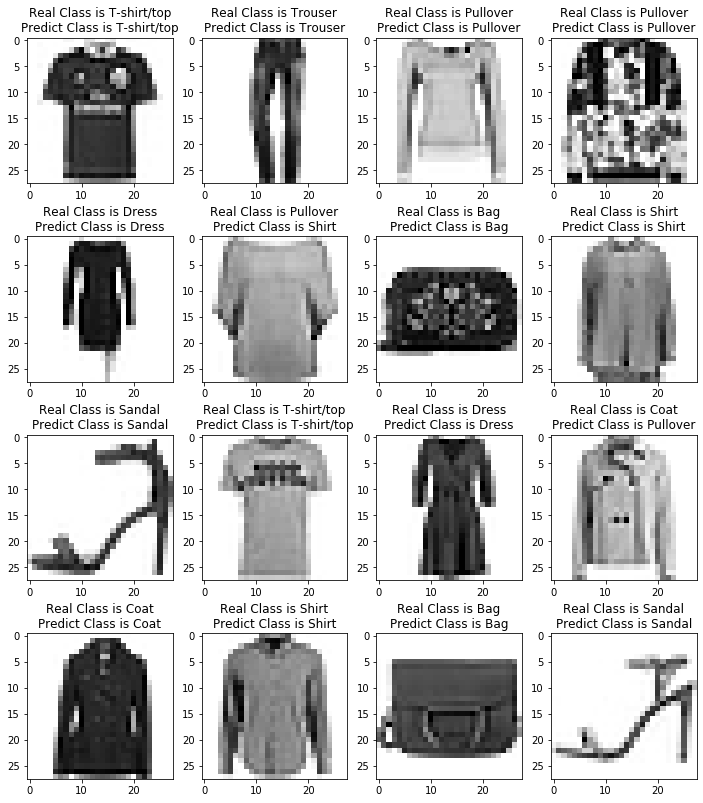

In [147]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {classes[y_cat_test[i].argmax()]}\nPredict Class is {classes[y_pred[i].argmax()]}");

In [148]:
#classification report and confusion matrix

In [151]:
predictions = model.predict(X_test)
# Convert predictions classes to one hot vectors 
predictions_classes = np.argmax(predictions, axis = 1)
# Convert test set observations to one hot vectors
y_true = np.argmax(y_cat_test, axis = 1)

In [156]:
print(classification_report(y_true, predictions_classes))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.93      0.86      0.89      1000
           3       0.93      0.95      0.94      1000
           4       0.88      0.91      0.90      1000
           5       0.99      0.98      0.99      1000
           6       0.76      0.84      0.80      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [153]:
print(confusion_matrix(y_true, predictions_classes))

[[839   1  23   8   0   1 123   0   5   0]
 [  0 992   1   6   0   0   1   0   0   0]
 [  7   0 859  10  56   1  66   0   1   0]
 [  7   3   5 949  20   0  14   0   2   0]
 [  1   1  15  16 914   0  52   0   1   0]
 [  0   0   0   0   0 984   0  14   1   1]
 [ 60   3  23  29  47   0 838   0   0   0]
 [  0   0   0   0   0   2   0 981   0  17]
 [  0   1   0   0   0   1   2   0 995   1]
 [  0   0   0   0   0   1   0  25   0 974]]


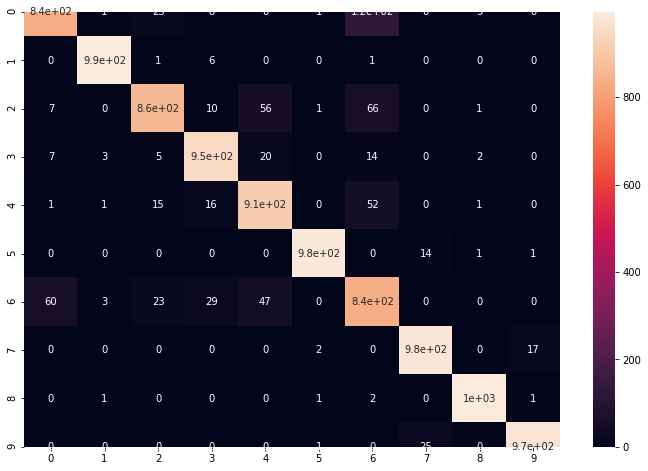

In [154]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_true, predictions_classes), annot=True)